<a href="https://colab.research.google.com/github/Blessing-Mvana-Nhlozi/Physics-Hons-Project/blob/main/Final_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation Modelling the Conductivity of Metal Oxide Gas Sensors from the First Principles

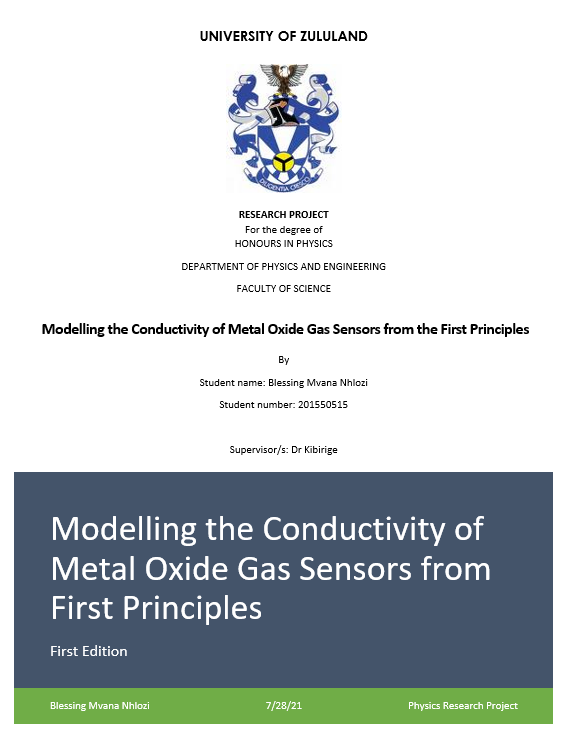

## Abstract

An environment was developed that simulates physical adsorption on the surface of semiconductor gas sensors from first principles and then modelled the experimental data using a Gaussian signal. This will have assisted when developing methods to analyse a system qualitatively or quantitatively. A mathematical time series expression relating to number of adsorbed gas molecules was established with meanings on it. Python used to create a simulation environment. Sklearn  was used to determine the accuracy of the simulation.

## Introduction

The purpose of simulating is to figure out how the process of gas detection works via relative conductivity signal. It gives a useful way of analysis that is simple to verify, discuss, and comprehend. Simulation modelling delivers valuable solutions across sectors and disciplines by providing clear insights into complicated systems. It should be possible to determine gas types and their concentrations by extracting discrete relative conductivity signal behaviour from experimental data.
Since, the adsorption period and its behaviour over time are dependent on the chemical molecule and their concentrations in the vicinity of the surface with respect to the adsorption on the surface, the transient period , or the time between the start of adsorption and the attainment of equilibrium, contains significant information about the adsorption of gases onto the surface of the sensor, the time between the start of adsorption and the attainment of equilibrium, contains significant information about the adsorption of gases onto the surface of absorbant. We created a way for detecting a gas using the integral transformation method based on this viewpoint. This procedure is less analytically precise than the predicted result, and it takes a lengthy time to do the analysis.


## Problem Statement

One of the most appealing areas of research in the domain of gas sensing is gas identification. The detection limit and sensitivity of sensors for specific chemical molecule, namely the invention and implementation of sensors to precisely detect a pollutant, are usually crucial in the research of gas detection by semiconductor sensors.  Sensors that selectively respond with certain chemical molecules have yet to be produced, although mixed gas sensors always yield a signal. Thus, uplifting the concern for researchers to seek for solutions. Therefore, simulating a conductivity of a semiconductor gas sensor from first principle to determine gas types and their concentrations.

## Simulation Model Development

### Importing Packages

In [1]:
import os
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams as rcP
from math import e
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Loading Experimental Data

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Blessing-Mvana-Nhlozi/Physics-Hons-Project/main/Data/Gas%20Sensors%20Experimental%20data_Blessing.csv?token=AVABSYAUORV7GYKR5OJR23DBZ45EI', sep=';')
df.head()

### Basic Simulation

In [19]:
# creating a function that will simulate the relative conductivity 
t=np.linspace(0,12.5,100)
def f(x,y):
    b=df.Time
    a=e**(-y*b)
    return x*(1-a)

In [5]:
HCHO2=f(0.0005,1.3)+0.0028
NO22=f(-0.001,2)+0.0028
MIXED2=f(-0.0005,3)+0.0028

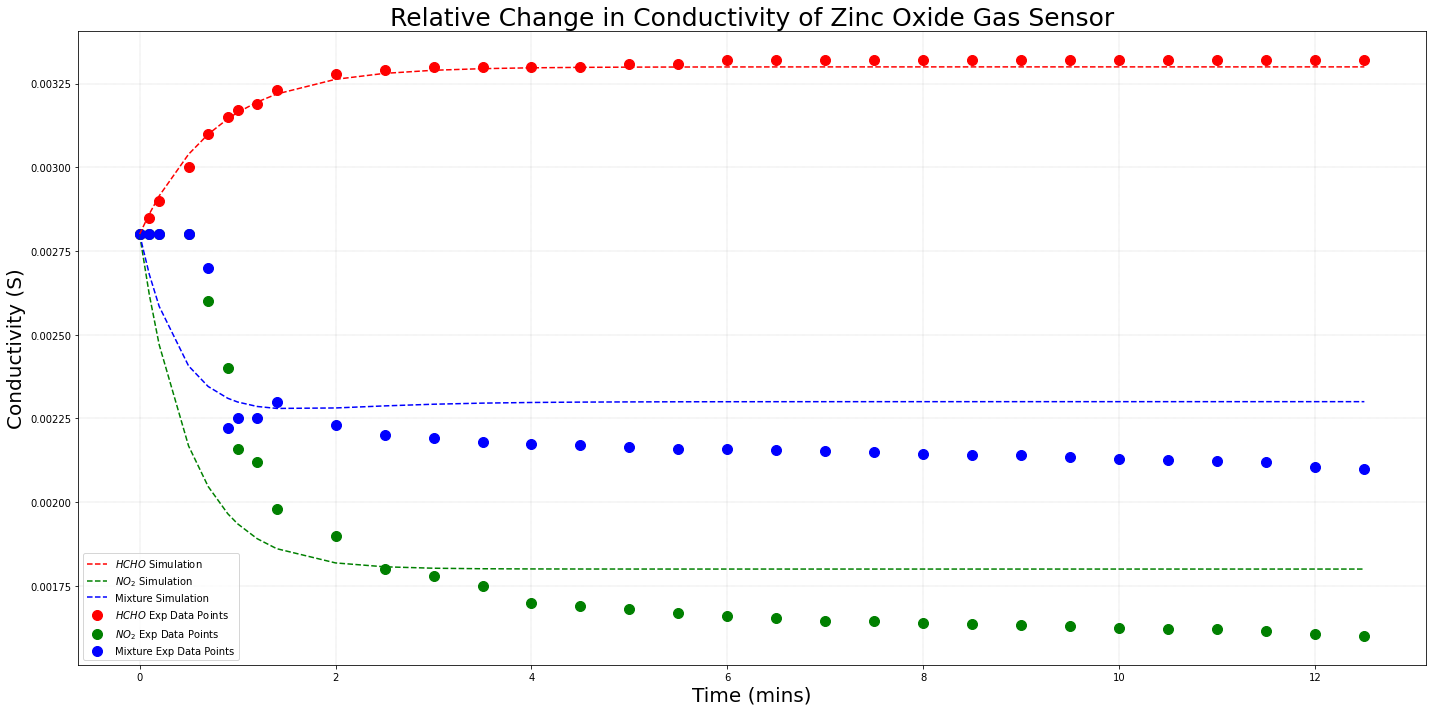

In [ ]:
rcP['figure.figsize']=20,10
plt.scatter(df.Time, df.HCHO, label='$HCHO$ Exp Data Points', alpha=1,color='red',s=100)
plt.plot(df.Time, HCHO2, 'r--',label='$HCHO$ Simulation')

plt.scatter(df.Time, df.NO2, label='$NO_2$ Exp Data Points', alpha=1,color='green',s=100)
plt.plot(df.Time, NO22,'g--', label='$NO_2$ Simulation')

plt.scatter(df.Time, df.MIXTURE, label='Mixture Exp Data Points', alpha=1,color='blue',s=100)
plt.plot(df.Time, HCHO2+NO22-0.0028,'b--', label='Mixture Simulation') #MIXED2

plt.xlabel('Time (mins)', {'size': 20})
plt.ylabel('Conductivity (S)', {'size': 20})
plt.title('Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 25})
plt.tight_layout()
plt.grid(color='K', linestyle='--', linewidth=0.1)
plt.legend();

In [ ]:
mean_squared_error(df.HCHO, HCHO2)

2.717620382699416e-10

In [ ]:
mean_squared_error(df.NO2, NO22)

5.231732158442857e-08

In [ ]:
mean_squared_error(df.MIXTURE, HCHO2+NO22-0.0028)

2.7231057940699712e-08

In [ ]:
dic={'period':df.Time,
     '$HCHO$ Exp Data Points':df.HCHO.to_list(),
     '$HCHO$ Simulation':HCHO2,
     '$NO_2$ Exp Data Points':df.NO2.to_list(),
     '$NO_2$ Simulation':NO22,
     'Mixture Exp Data Points':df.MIXTURE.to_list(),
     'Mixture Simulation':MIXED2}
df2=pd.DataFrame(dic)
df2

,period,$HCHO$ Exp Data Points,$HCHO$ Simulation,$NO_2$ Exp Data Points,$NO_2$ Simulation,Mixture Exp Data Points,Mixture Simulation
0,0.0,0.00280,0.002800,0.002800,0.002800,0.002800,0.002800
1,0.1,0.00285,0.002861,0.002800,0.002619,0.002800,0.002670
2,0.2,0.00290,0.002914,0.002800,0.002470,0.002800,0.002574
3,0.5,0.00300,0.003039,0.002800,0.002168,0.002800,0.002412
4,0.7,0.00310,0.003099,0.002600,0.002047,0.002700,0.002361
5,0.9,0.00315,0.003145,0.002400,0.001965,0.002220,0.002334
6,1.0,0.00317,0.003164,0.002160,0.001935,0.002250,0.002325
7,1.2,0.00319,0.003195,0.002120,0.001891,0.002250,0.002314
8,1.4,0.00323,0.003219,0.001980,0.001861,0.002300,0.002307
9,2.0,0.00328,0.003263,0.001900,0.001818,0.002230,0.002301


### Gaussian Simulation and Linear Optimization

In [4]:
def g(a,b,c,h,t=np.linspace(0,12.5,100)):
   d=-(t/b)**c
   f=1-e**d
   return a*f +h*t +0.0028

In [6]:
dic3={'period':df.Time,
     '$HCHO$ Exp Data Points':df.HCHO.to_list(),
     '$HCHO$ Simulation':g(0.0005,0.75,1,1/360000,df.Time),
     '$NO_2$ Exp Data Points':df.NO2.to_list(),
     '$NO_2$ Simulation':g(-0.001,1,4,0,df.Time),
     'Mixture Exp Data Points':df.MIXTURE.to_list(),
     'Mixture Simulation':g(-0.0005,0.75,13,0,df.Time)}
df3=pd.DataFrame(dic3)
df3

,period,$HCHO$ Exp Data Points,$HCHO$ Simulation,$NO_2$ Exp Data Points,$NO_2$ Simulation,Mixture Exp Data Points,Mixture Simulation
0,0.0,0.00280,0.002800,0.002800,0.002800,0.002800,0.002800
1,0.1,0.00285,0.002863,0.002800,0.002800,0.002800,0.002800
2,0.2,0.00290,0.002918,0.002800,0.002798,0.002800,0.002800
3,0.5,0.00300,0.003045,0.002800,0.002739,0.002800,0.002797
4,0.7,0.00310,0.003105,0.002600,0.002587,0.002700,0.002633
5,0.9,0.00315,0.003152,0.002400,0.002319,0.002220,0.002300
6,1.0,0.00317,0.003171,0.002160,0.002168,0.002250,0.002300
7,1.2,0.00319,0.003202,0.002120,0.001926,0.002250,0.002300
8,1.4,0.00323,0.003227,0.001980,0.001821,0.002300,0.002300
9,2.0,0.00328,0.003271,0.001900,0.001800,0.002230,0.002300


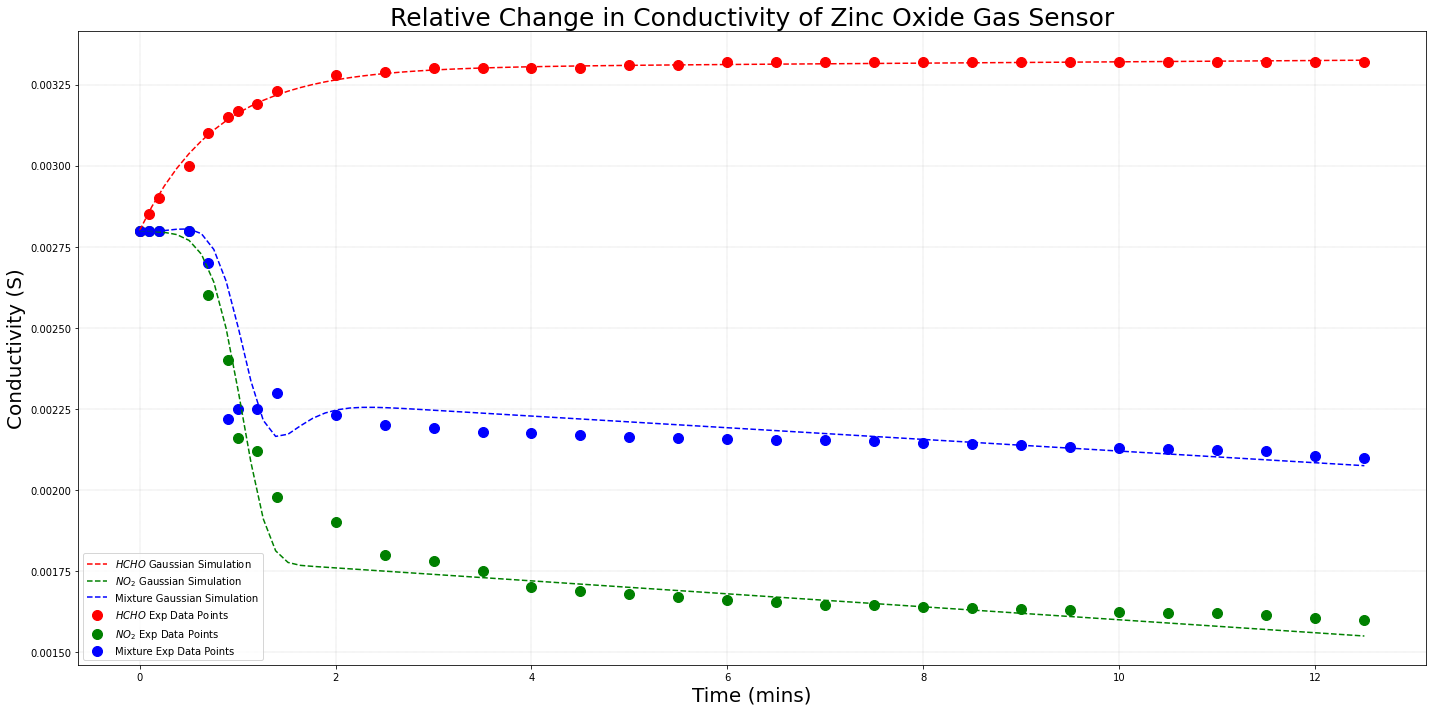

In [38]:
rcP['figure.figsize']=20,10
plt.plot(t,g(0.0005,0.79,1,1/498000),'r--',label='$HCHO$ Gaussian Simulation') 
plt.scatter(df.Time, df.HCHO, label='$HCHO$ Exp Data Points', alpha=1,color='red',s=100)

plt.plot( t,g(-0.001,1.1,5,-1/50000),'g--',label='$NO_2$ Gaussian Simulation') 
plt.scatter(df.Time, df.NO2, label='$NO_2$ Exp Data Points', alpha=1,color='green',s=100)

plt.plot( t, g(0.0005,1.3,2.8,1/498000,t)+g(-0.001,1.1,5,-1/50000,t)-0.0028,'b--',label='Mixture Gaussian Simulation')# g(-0.0005,1.1,5,-(31/1800000)
plt.scatter(df.Time, df.MIXTURE, label='Mixture Exp Data Points', alpha=1,color='blue',s=100)

plt.xlabel('Time (mins)', {'size': 20})
plt.ylabel('Conductivity (S)', {'size': 20})
plt.title('Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 25})
plt.tight_layout()
plt.grid(color='K', linestyle='--', linewidth=0.1)
plt.legend();

In [51]:
mean_squared_error(df.HCHO, g(0.0005,0.8,1,1/498000,df.Time))

8.106491079751023e-11

In [ ]:
mean_squared_error(df.NO2, g(-0.001,1.1,5,-1/50000,df.Time))

3.9580401234476704e-09

In [37]:
mean_squared_error(df.MIXTURE, g(0.0005,1.3,2.8,1/498000,df.Time)+g(-0.001,1.1,5,-1/50000,df.Time)-0.0028)

9.053087842241475e-09

In [41]:
t=np.linspace(0,12.5,101)